# Data Cleaning

---
### Essential Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
%matplotlib inline
import json 

---
### Import the Dataset

In [2]:
def trim(dataset):
    '''Trim whitespace from ends of each values across all series in dataframe'''
    trim = lambda x: x.strip() if type(x) is str else x
    return dataset.applymap(trim)

# Display all column names
pd.set_option('display.max_columns', None)

raw_data = trim(pd.read_csv('data/raw_data.csv'))
raw_data.head()

,id,imdb_id,adult,belongs_to_collection,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,100,tt0120735,False,NaN,1350000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",en,"Lock, Stock and Two Smoking Barrels",A card shark and his unwillingly-enlisted frie...,8.871,"[{'id': 491, 'logo_path': '/rUp0lLKa1pr4UsPm8f...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",5/3/1998,28356188.0,105.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"Lock, Stock and Two Smoking Barrels",False,8.2,4722.0
1,101,tt0110413,False,NaN,16000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",en,L??on: The Professional,"L??on, the top hit man in New York, has earned...",34.591,"[{'id': 9, 'logo_path': '/nda3dTUYdDrJ6rZqBpYv...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",14/9/1994,45284974.0,111.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,L??on: The Professional,False,8.3,10702.0
2,102,tt0315543,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",da,Elsker dig for evigt,Cecilie and Joachim are about to get married w...,4.262,"[{'id': 76, 'logo_path': None, 'name': 'Zentro...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}]",6/9/2002,0.0,113.0,"[{'english_name': 'Danish', 'iso_639_1': 'da',...",Released,Open Hearts,False,7.1,61.0
3,103,tt0075314,False,NaN,1300000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",en,Taxi Driver,A mentally unstable Vietnam War veteran works ...,28.735,"[{'id': 46059, 'logo_path': None, 'name': 'Ita...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/2/1976,28262574.0,114.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Taxi Driver,False,8.2,7973.0
4,104,tt0130827,False,NaN,1530000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",de,Lola rennt,Lola receives a phone call from her boyfriend ...,10.156,"[{'id': 96, 'logo_path': '/9ps82gVzUeNdkjmLzoG...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",3/3/1998,7267585.0,81.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,Run Lola Run,False,7.3,1485.0


In [3]:
# Inforamtion about the Variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18315 entries, 0 to 18314
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     18315 non-null  int64  
 1   imdb_id                13226 non-null  object 
 2   adult                  13512 non-null  object 
 3   belongs_to_collection  2764 non-null   object 
 4   budget                 18315 non-null  int64  
 5   genres                 18315 non-null  object 
 6   original_language      18315 non-null  object 
 7   original_title         18315 non-null  object 
 8   overview               13650 non-null  object 
 9   popularity             18314 non-null  float64
 10  production_companies   18314 non-null  object 
 11  production_countries   18314 non-null  object 
 12  release_date           18306 non-null  object 
 13  revenue                18314 non-null  float64
 14  runtime                18289 non-null  float64
 15  sp

In [4]:
# describe our data
raw_data.describe()

,id,budget,popularity,revenue,runtime,vote_average,vote_count
count,18315.000000,1.831500e+04,18314.000000,1.831400e+04,18289.000000,18314.000000,18314.000000
mean,51272.995086,2.156098e+07,16.659693,6.502424e+07,103.354311,6.023305,964.792399
std,120357.920870,3.867065e+07,82.532808,1.500865e+08,27.712592,1.607940,2127.626233
min,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,5175.000000,0.000000e+00,4.888000,0.000000e+00,91.000000,5.600000,28.000000
50%,12158.000000,3.500000e+06,9.707500,6.179282e+06,101.000000,6.300000,173.500000
75%,19541.500000,2.800000e+07,16.613500,6.336137e+07,115.000000,6.900000,887.000000
max,816173.000000,9.653130e+08,9975.169000,2.797801e+09,540.000000,10.000000,28790.000000


---
### Remove duplicate rows  based on movie id

In [5]:
raw_data = raw_data.drop_duplicates(subset='id', keep="first")
print('Data dims after removing duplicate value: ', raw_data.shape)

Data dims after removing duplicate value:  (13529, 21)


---
### Drop unused columns in the analysis
Useless columns ('id', 'imdb_id', 'adult', 'belongs_to_collection', 'original_language', 'original_title', 'overview', 'production_countries', 'spoken_languages', 'video')



In [6]:
raw_data.drop(['id', 'imdb_id', 'adult', 'belongs_to_collection', 'original_language', 
               'original_title', 'overview', 'production_countries', 'spoken_languages', 'video'],axis=1,inplace=True)

---
### Drop columns which have more than 40% data missing

In [7]:
def drop_col(df, col_name, cutoff):
    n = len(df)
    cnt = df[col_name].count()
    if(float(cnt) / n) < cutoff:
        df.drop(col_name, axis=1, inplace=True)
        
for column in raw_data.columns:
    drop_col(raw_data, column, cutoff=0.6)
    

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13529 entries, 0 to 18314
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                13529 non-null  int64  
 1   genres                13529 non-null  object 
 2   popularity            13528 non-null  float64
 3   production_companies  13528 non-null  object 
 4   release_date          13520 non-null  object 
 5   revenue               13528 non-null  float64
 6   runtime               13503 non-null  float64
 7   status                13528 non-null  object 
 8   title                 13528 non-null  object 
 9   vote_average          13528 non-null  float64
 10  vote_count            13528 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.2+ MB


---
### Drop rows which contain incorrect or inappropriate values
**- zero values in the budget, revenue and runtime columns** (Calculating the profits of these movies would lead to inappropriate results. I think this may be due to varying factors like the lack of information, or the movies that were never released.)

In [8]:
print("Rows with zero values in Budget: ", raw_data[(raw_data['budget']==0)].shape[0])
print("Rows with zero values in Revenue: ", raw_data[(raw_data['revenue']==0)].shape[0])
print("Rows with zero values in Runtime: ", raw_data[(raw_data['runtime']==0)].shape[0])

# raw_data = raw_data.loc[raw_data['budget'] * raw_data['revenue'] * raw_data['runtime'] != 0]

# Another method, which can be easily extended to several columns
raw_data = raw_data.loc[(raw_data[['budget', 'revenue', 'runtime']] != 0).all(axis=1)]

Rows with zero values in Budget:  7136
Rows with zero values in Revenue:  7035
Rows with zero values in Runtime:  229


**- Zero values in the vote_count columns** (Zero vote_count will also lead to a zero vote_average, which would lead to inapproriate results)

In [9]:
print("Rows with zero values in Vote_count: ", raw_data[(raw_data['vote_count']==0)].shape[0])

# Another method, which can be easily extended to several columns
raw_data = raw_data.loc[(raw_data[['vote_count']] != 0).all(axis=1)]

Rows with zero values in Vote_count:  28


**- Post Production for the status columns**

In [10]:
print("Movies under post production: ", raw_data[(raw_data['status']=='Post Production')].shape[0])

raw_data = raw_data.loc[raw_data['status'] != 'Post Production']

# Drop status columns
raw_data.drop(['status'], axis=1, inplace=True)
raw_data = raw_data.reset_index(drop=True)

Movies under post production:  1


---
### Convert columns from json to string

* json.loads() takes in a string and returns a json object
* json.dumps() takes in a json object and returns a string


```python
# Have troubles: JSONDecodeError

def json_to_str(df, col_name: str):
    df[col_name] = df[col_name].apply(json.loads)
    for index, i in zip(df.index, df[col_name]):
        list1 = []
        for j in range(len(i)):
            # the key 'name' contains the name
            list1.append((i[j]['name']))
        df.loc[index, col_name] = str(list1)
    
json_col = ['genres', 'production_companies']
for col_name in json_col:
    json_to_str(raw_data, col_name)
    
raw_data.head()
```

In [11]:
print('Sample Value:')
print(raw_data.loc[0, 'genres'])
print(raw_data.loc[0, 'production_companies'])

Sample Value:
[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'name': 'Crime'}]
[{'id': 491, 'logo_path': '/rUp0lLKa1pr4UsPm8fgzmnNGxtq.png', 'name': 'Summit Entertainment', 'origin_country': 'US'}, {'id': 21920, 'logo_path': None, 'name': 'The Steve Tisch Company', 'origin_country': ''}, {'id': 13419, 'logo_path': None, 'name': 'SKA Films', 'origin_country': ''}, {'id': 1382, 'logo_path': '/sOg7LGESPH5vCTOIdbMhLuypoLL.png', 'name': 'PolyGram Filmed Entertainment', 'origin_country': 'US'}, {'id': 20076, 'logo_path': '/i9qXGJIP9fGN22PP5jXUVENbyHi.png', 'name': 'HandMade Films', 'origin_country': 'GB'}]


In [12]:
import ast

def neat_json_col(raw_data, col_name: str):
    raw_l = []
    col_l = []
    for index, row in raw_data.iterrows():
        raw_l = ast.literal_eval(row[col_name])
        cell_l = []
        
        for i in range(len(raw_l)):
            cell_l.append(raw_l[i]['name'])
        col_l.append(cell_l)
        
    raw_data[col_name] = pd.Series(col_l)

        
json_col = ['genres', 'production_companies']
for col_name in json_col:
    neat_json_col(raw_data, col_name)

In [13]:
print('Sample Result:')
print(raw_data.loc[0, 'genres'])
print(raw_data.loc[0, 'production_companies'])

Sample Result:
['Comedy', 'Crime']
['Summit Entertainment', 'The Steve Tisch Company', 'SKA Films', 'PolyGram Filmed Entertainment', 'HandMade Films']


---
### Change string format of release_date into Datatime format

In [14]:
raw_data['release_date'] = pd.to_datetime(raw_data['release_date'])
raw_data['release_date'].head()

0   1998-05-03
1   1994-09-14
2   1976-09-02
3   1998-03-03
4   1985-03-07
Name: release_date, dtype: datetime64[ns]

---
### Extract year and month of release date and Put into new columns
- Create a new column: 

    ``` movies["new_columns"] = "" ```
    
    
- Extract year from datetime: 

    ``` df['date'] = pd.to_datetime(df['date']) ```
    
    ``` df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month ```

In [15]:
# Extract year and month of release date and Put into new columns
raw_data['release_year'] = raw_data['release_date'].dt.year
raw_data['release_month'] = raw_data['release_date'].dt.month

# Drop release_date columns
raw_data.drop(['release_date'],axis=1,inplace=True)
raw_data = raw_data.reset_index(drop=True)

# Fill NA/NaN values using 0
raw_data['release_year'] = raw_data['release_year'].fillna(0)
raw_data['release_month'] = raw_data['release_month'].fillna(0)

# Convert dtypes of columns
raw_data['release_year'] = raw_data['release_year'].astype('int64')
raw_data['release_month'] = raw_data['release_month'].astype('category')

display(raw_data['release_year'].describe())
display(raw_data['release_month'].describe())

count    5254.000000
mean     2001.101447
std        14.896501
min      1915.000000
25%      1995.000000
50%      2005.000000
75%      2011.000000
max      2021.000000
Name: release_year, dtype: float64

count     5254
unique      12
top         12
freq       561
Name: release_month, dtype: int64

---
### Drop rows which release_year >= 1990 and Adjust the revenue according to inflation

In [16]:
# Inflation rate to transform the revenue in the early years to the equvilence revenue in 2021
# Data get from https://smartasset.com/investing/inflation-calculator
inflation = [2.05,1.97,1.91,1.86,1.81,1.76,1.71,1.67,1.65,1.61,1.56,1.52,1.49,1.46,1.42,1.37,1.33,1.29,1.25,1.25,
            1.23,1.19,1.17,1.15,1.13,1.13,1.12,1.10,1.07,1.05,1.04,1] 

raw_data = raw_data.loc[raw_data['release_year']>=1990]
raw_data = raw_data.reset_index(drop=True)

In [17]:
adjusted_revenue = []
adjusted_budget = []
for index, rows in raw_data.iterrows():
    adjusted_revenue.append(int(rows['revenue'] * inflation[rows['release_year']-1990]))
    adjusted_budget.append(int(rows['budget'] * inflation[rows['release_year']-1990]))
    
adjusted_revenue = pd.DataFrame(adjusted_revenue, columns = ['adj_revenue'])
adjusted_budget = pd.DataFrame(adjusted_budget, columns = ['adj_budget'])
raw_data = pd.concat([raw_data, adjusted_revenue, adjusted_budget], axis = 1)
raw_data.head()

,budget,genres,popularity,production_companies,revenue,runtime,title,vote_average,vote_count,release_year,release_month,adj_revenue,adj_budget
0,1350000,"[Comedy, Crime]",8.871,"[Summit Entertainment, The Steve Tisch Company...",28356188.0,105.0,"Lock, Stock and Two Smoking Barrels",8.2,4722.0,1998,5,46787710,2227500
1,16000000,"[Crime, Drama, Action]",34.591,"[Gaumont, Les Films du Dauphin]",45284974.0,111.0,L??on: The Professional,8.3,10702.0,1994,9,81965802,28960000
2,1530000,"[Action, Drama, Thriller]",10.156,"[X Filme Creative Pool, WDR]",7267585.0,81.0,Run Lola Run,7.3,1485.0,1998,3,11991515,2524500
3,10000000,"[Crime, Comedy]",17.128,"[Screen Gems, SKA Films, Columbia Pictures]",83557872.0,104.0,Snatch,7.8,6519.0,2000,1,130350280,15600000
4,14000000,"[Romance, Comedy]",51.140,"[Touchstone Pictures, Silver Screen Partners IV]",463000000.0,119.0,Pretty Woman,7.4,5615.0,1990,3,949149999,28699999


<AxesSubplot:xlabel='revenue', ylabel='Count'>

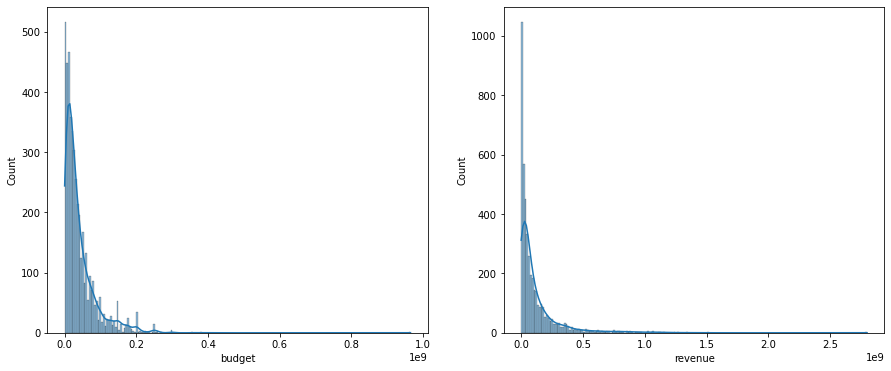

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

sb.histplot(raw_data['budget'], ax=ax1, kde=True)
sb.histplot(raw_data['revenue'], ax=ax2, kde=True)

<AxesSubplot:xlabel='adj_revenue', ylabel='Count'>

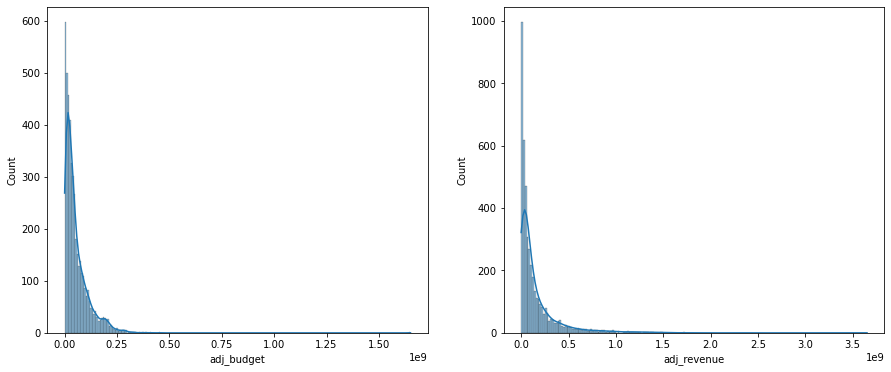

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

sb.histplot(raw_data['adj_budget'], ax=ax1, kde=True)
sb.histplot(raw_data['adj_revenue'], ax=ax2, kde=True)

In [20]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4478 entries, 0 to 4477
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   budget                4478 non-null   int64   
 1   genres                4478 non-null   object  
 2   popularity            4478 non-null   float64 
 3   production_companies  4478 non-null   object  
 4   revenue               4478 non-null   float64 
 5   runtime               4478 non-null   float64 
 6   title                 4478 non-null   object  
 7   vote_average          4478 non-null   float64 
 8   vote_count            4478 non-null   float64 
 9   release_year          4478 non-null   int64   
 10  release_month         4478 non-null   category
 11  adj_revenue           4478 non-null   int64   
 12  adj_budget            4478 non-null   int64   
dtypes: category(1), float64(5), int64(4), object(3)
memory usage: 424.7+ KB


In [21]:
raw_data.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,adj_revenue,adj_budget
count,4.478000e+03,4478.000000,4.478000e+03,4478.000000,4478.000000,4478.000000,4478.000000,4.478000e+03,4.478000e+03
mean,4.060529e+07,26.228416,1.196056e+08,110.036177,6.423024,2097.398392,2005.930326,1.566573e+08,5.419486e+07
std,4.707478e+07,157.743552,1.998341e+08,20.848026,0.852666,3148.538133,7.897182,2.495380e+08,6.113924e+07
min,1.000000e+00,0.019984,1.000000e+00,3.000000,1.000000,1.000000,1990.000000,1.000000e+00,1.000000e+00
25%,1.100000e+07,10.302500,1.562921e+07,96.000000,5.900000,251.000000,2000.000000,2.285673e+07,1.469250e+07
50%,2.500000e+07,14.177500,4.989576e+07,106.000000,6.400000,906.000000,2006.000000,6.708825e+07,3.496000e+07
75%,5.100000e+07,23.319500,1.340269e+08,121.000000,7.000000,2520.750000,2012.000000,1.815728e+08,7.450000e+07
max,9.653130e+08,9975.169000,2.797801e+09,338.000000,10.000000,28790.000000,2021.000000,3.653065e+09,1.650685e+09


---
### Export new dataframe to a csv file

In [22]:
# index= False to not write out an unamed index column
raw_data.to_csv(r'data\cleaned_data.csv', index=False)